## **PROBLEM STATEMENT :-**

### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.



### ***Our main objective is to predict the stock’s closing price of the month.*** 

* github url-link:https://github.com/Priyamadke/ml_Yes_bank_closing_price_prediction

#load the dataset and import the libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Let's begin

In [53]:
import warnings
warnings.filterwarnings('ignore')
#reading the csv dataset either from the local path or from the github repository...
# Data Loading...
import os
def find_file(file_name, folder="."):
    for root, dirs, files in os.walk(folder):
        if file_name in files:
            return os.path.join(root, file_name)
    return None

file_path = find_file("data_YesBank_StockPrices.csv")
if file_path:
    print(f"File found at: {file_path}")
    df = pd.read_csv(file_path)
    print("Data loaded successfully from local path.")
else:
    print("File not found in the current folder. Reading data from GITHUB repo ==> ")
    df = pd.read_csv("https://raw.githubusercontent.com/Priyamadke/ml_Yes_bank_closing_price_prediction/main/data_YesBank_StockPrices.csv")
    print("Data loaded successfully from GITHUB repo.")

File found at: .\data_YesBank_StockPrices.csv
Data loaded successfully from local path.


In [54]:
df.head(5)               # first five view of dataset.

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [55]:
df.tail(5)      # here we can see the 5 last datapoints.

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


Explaining the data:-
We have a dataset containing values of Yes bank monthly stock prices as mentioned in our problem statement. 

Explaining the features present :-


*  **Date :-** The date (Month and Year provided)
*  **Open :-** The price of the stock at the beginning of a particular time period.
*  **High :-**The Peak(Maximum) price at which a stock traded during the period.
*  **Low :-**The Lowest price at which a stock traded during the period.
*  **Close :-** The trading price at the end (in this case end of the month).

data cleaning

In [56]:
df.shape     # here we can see 185 rows and 5 columns.

(185, 5)

In [57]:
df.columns     # here we see the 5 col names.

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [58]:
df.dtypes         # here we see which datatype is present in dataset.

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [59]:
df.info()        # here we see all info about data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [60]:
df.describe()    

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [61]:
df.isnull().sum()          # here we do't see any null value.

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [62]:
df[df.duplicated()==True]      # here we don't see duplicated value. 

,Date,Open,High,Low,Close


In [63]:
df['Date']       # as we can see here the date in str format or datatype.

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

In [64]:
# before give thid data to model we can modify the datatype of date.
# here we modify the date to proper datetime format.
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))     # this converts date to a yyyy-mm-dd format.

In [65]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


We can see from the dataframe above, all the columns we have contain numerical data. There is no categorical data present.

In [66]:
df.set_index('Date', inplace=True)           # setting Date column as index.

In [67]:
# checking the data.
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


We can see from the dataframe above, all the columns we have contain numerical data. There is no categorical data present.

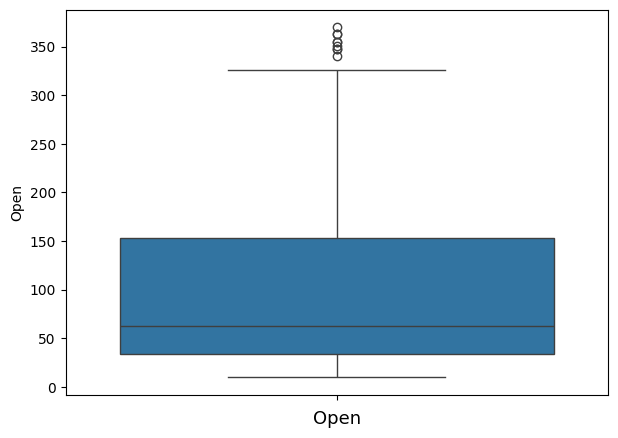

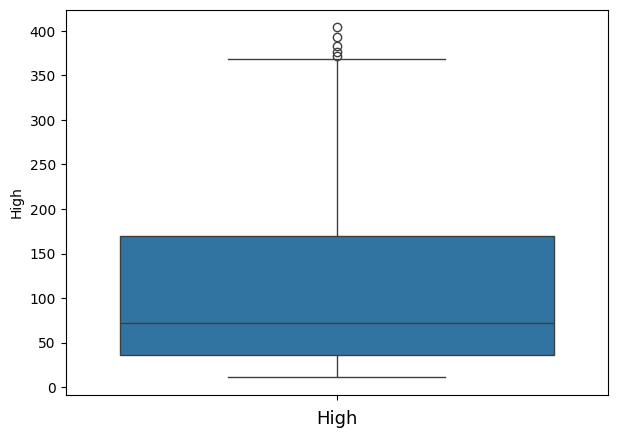

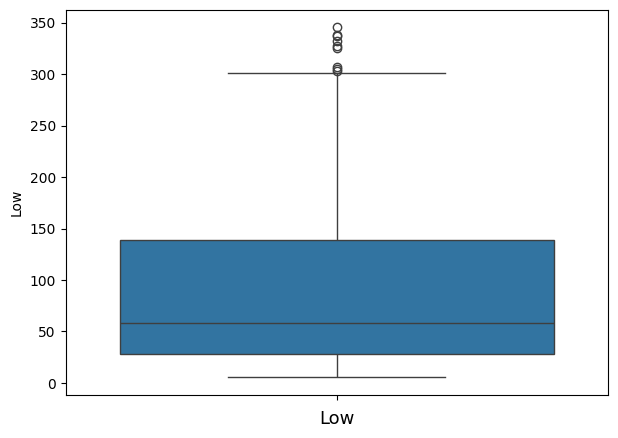

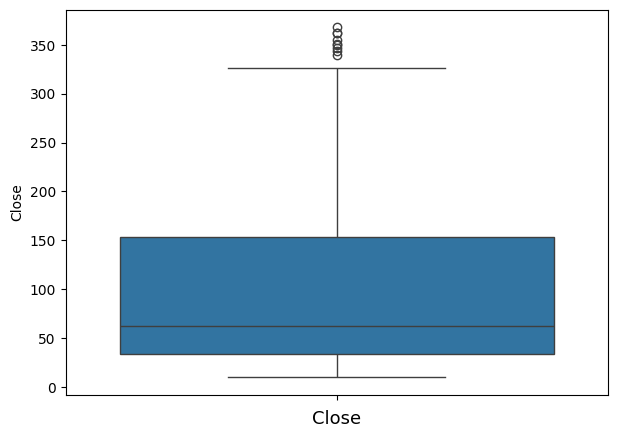

In [68]:
# Checking all features for presence of outliers.
for col in df.columns:
  plt.figure(figsize=(7,5))
  sns.boxplot(df[col])
  plt.xlabel(col, fontsize=13)
  plt.show()

As we can see there are some outliers present in our data. We will need to deal with these before proceeding to modelling.

## Exploratory data analysis   

In [69]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


In [70]:
inde_var=df.columns.tolist()[:-1]
depe_var=['Close']
print(inde_var)
print(depe_var)

['Open', 'High', 'Low']
['Close']


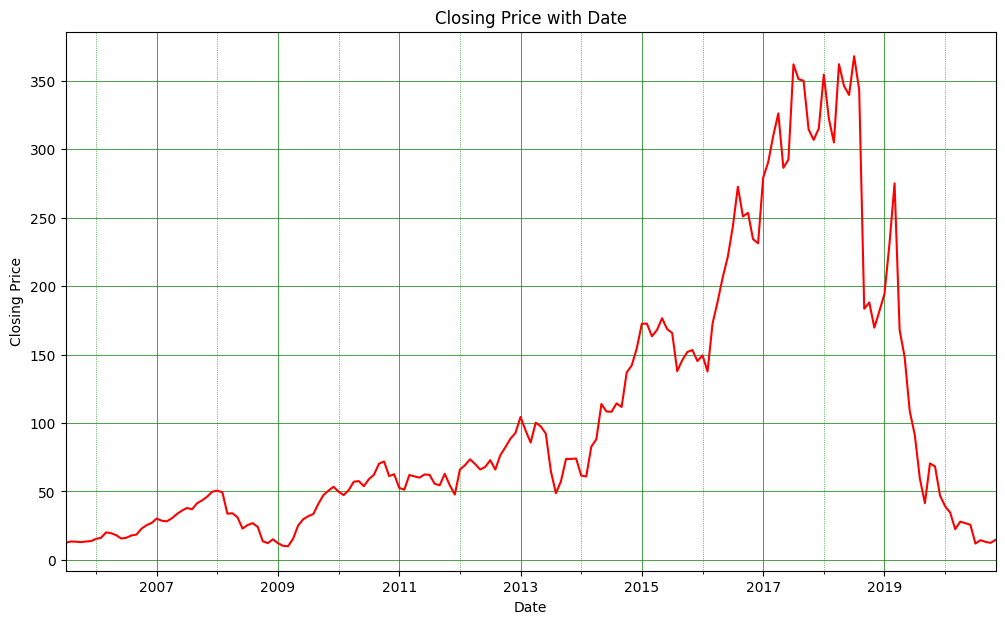

In [71]:
# Plotting the dependent variable .
plt.figure(figsize=(12,7))
df['Close'].plot(color = 'r')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Date')
plt.show()

In [72]:
import warnings
warnings.filterwarnings('ignore')

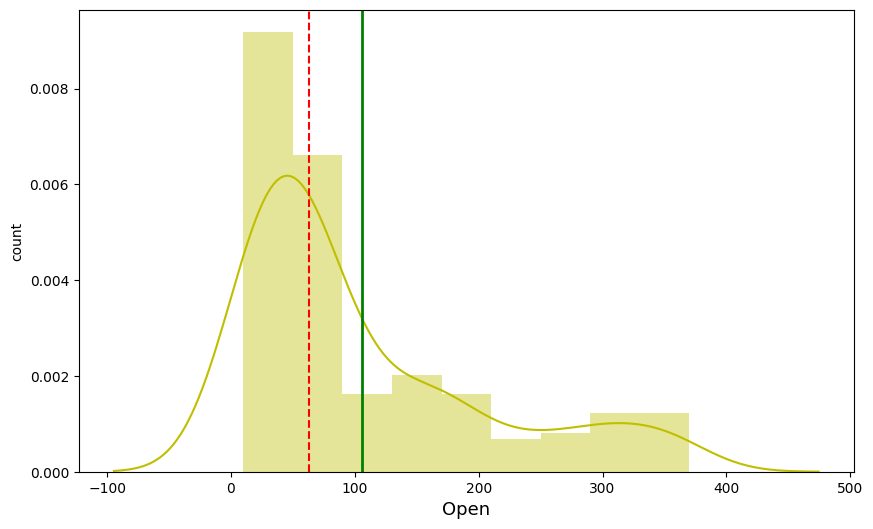

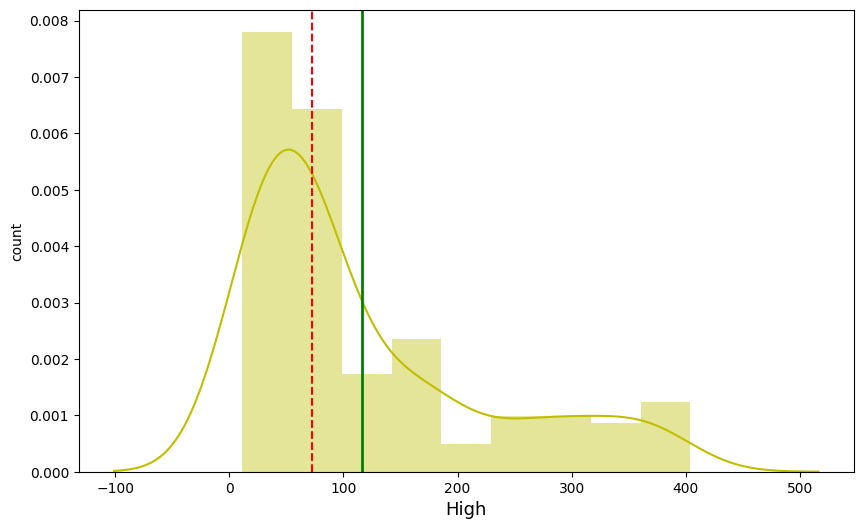

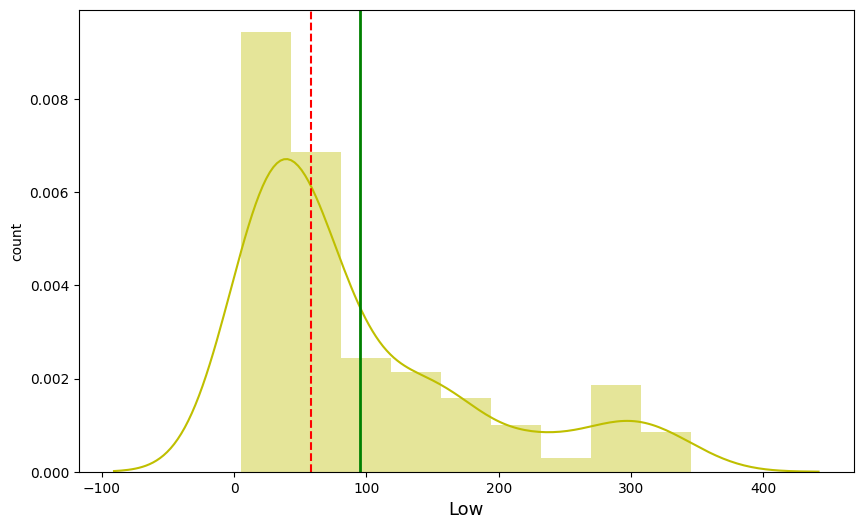

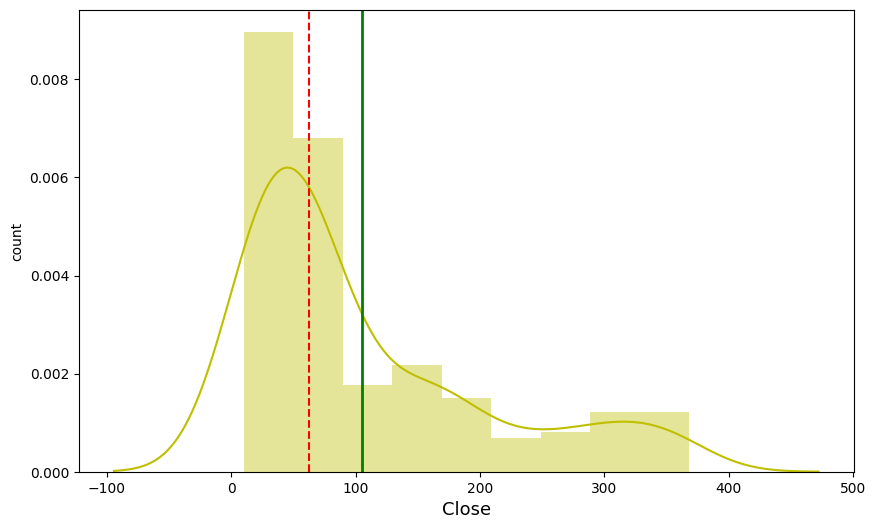

In [73]:
# Plotting the distributions of all features.
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col], color='y')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(df[col].mean(),color='green',linewidth=2)                            # axvline plots a vertical line at a value (mean in this case). 
  plt.axvline(df[col].median(),color='red',linestyle='dashed',linewidth=1.5)
  plt.show()

We can clearly see that ***these distributions are positively skewed***. The mean and median are at significant distance from each other.

So we need to transform them into something close to a Normal Distribution as our models give optimal results that way

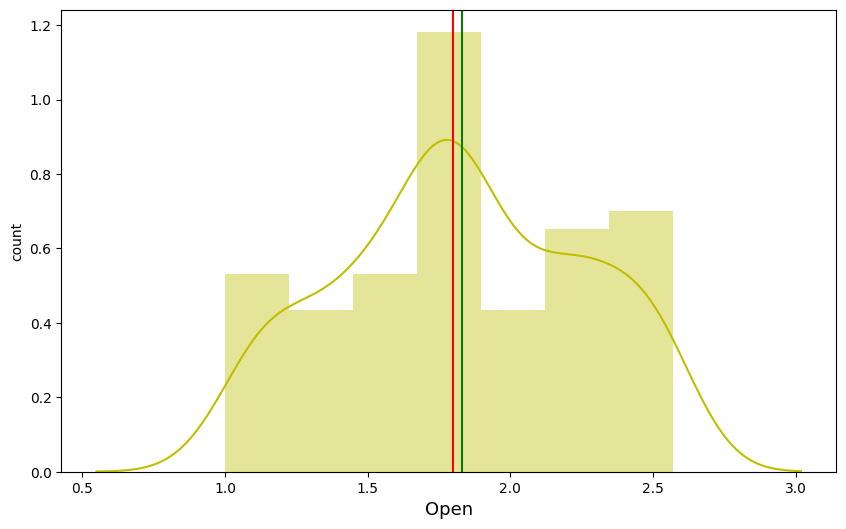

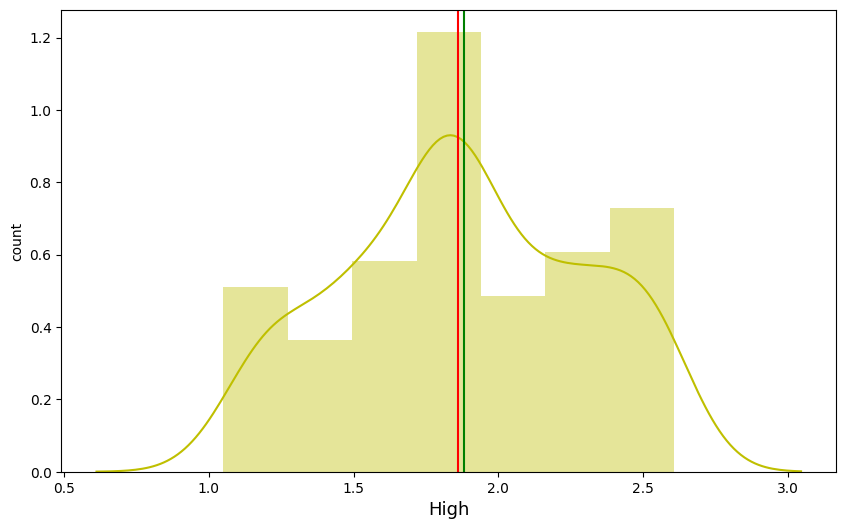

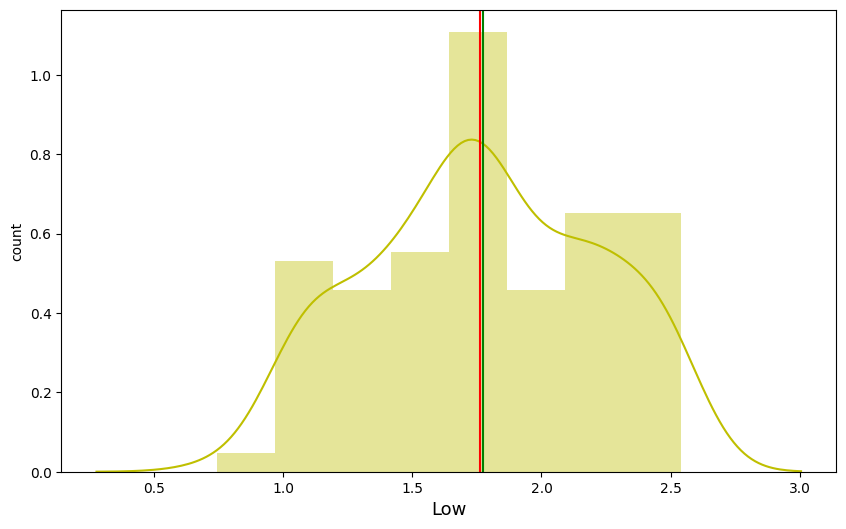

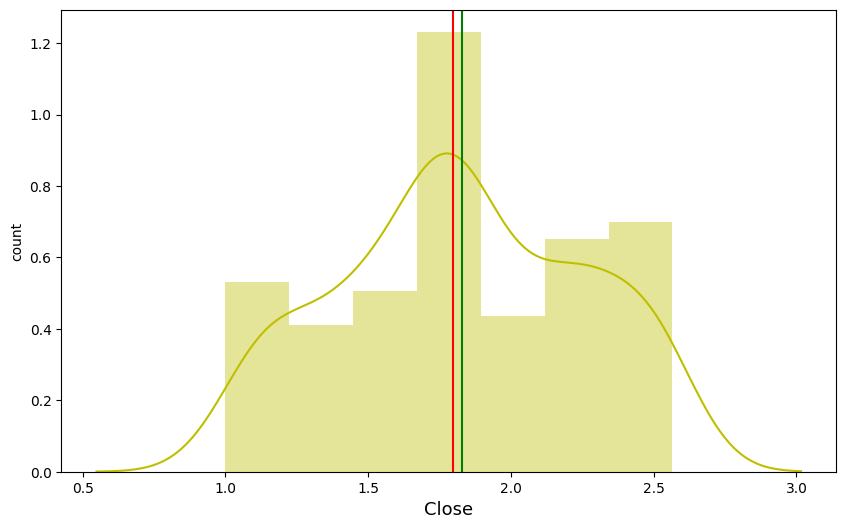

In [74]:
# Lets use log transformation on these features using np.log() and plot them.
for col in df.columns:
    plt.figure(figsize=(10,6))
    sns.distplot(np.log10(df[col]), color='y')
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')
    
    # plotting the mean and median
    plt.axvline(np.log10(df[col]).mean(),color='Green')
    plt.axvline(np.log10(df[col]).median(),color='Red')
    plt.show()

Now you can see the distribution is nearly normal distribution. mean and median also very similar to each other.

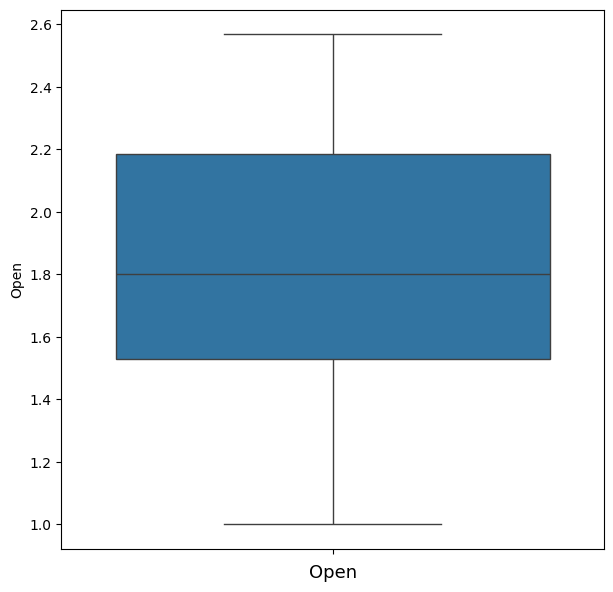

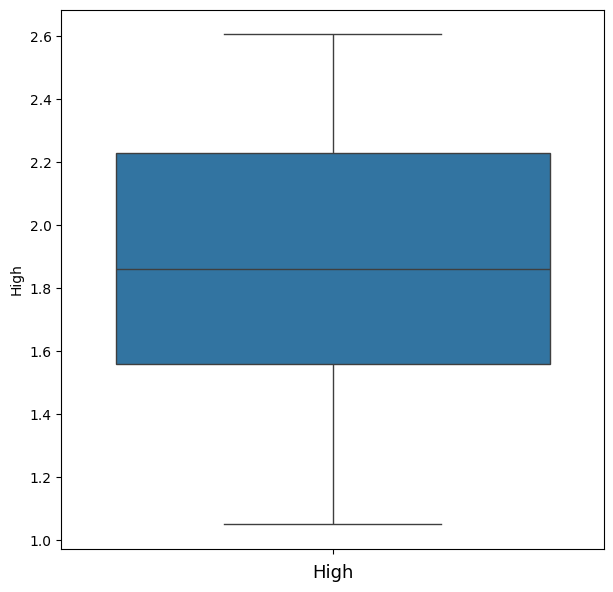

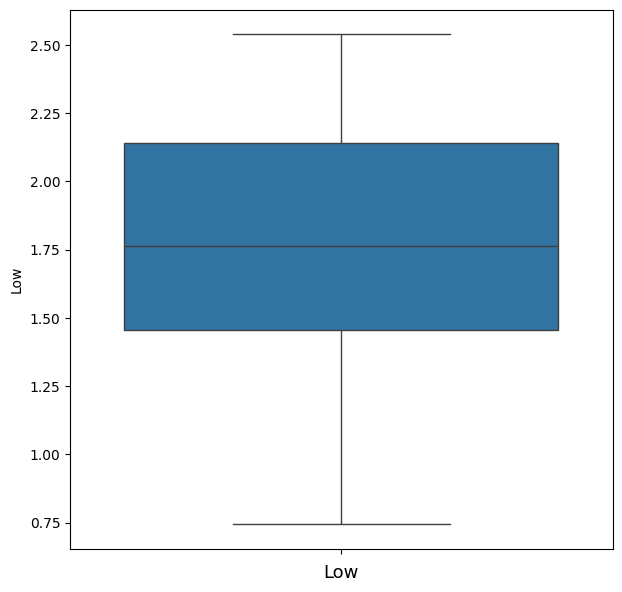

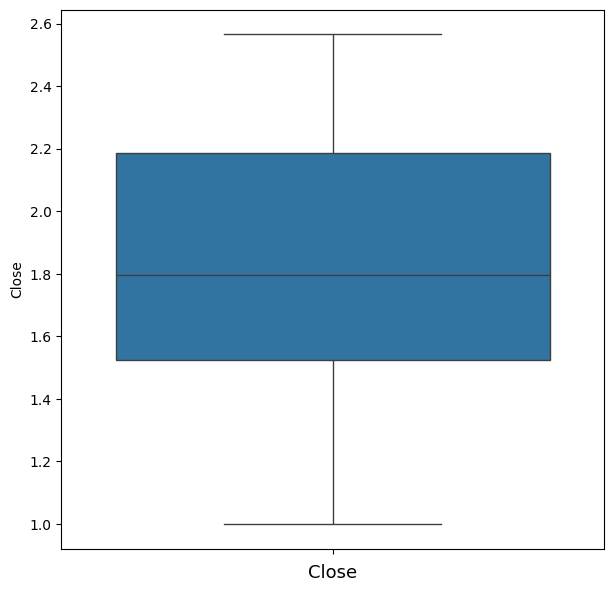

In [75]:
for col in df.columns:        # check the outliers after transform variable data
    plt.figure(figsize=(7,7))
    sns.boxplot(np.log10(df[col]))
    plt.xlabel(col, fontsize=13)
    plt.show()

Now, we have no outliers anymore. Log transformation diminishes the outlier's effect. 

***Since we have a very small dataset to work with, dropping the outliers completely is not a good idea.*** So this is how we are going to leave them.

In [76]:
cor=df.corr()

<Axes: >

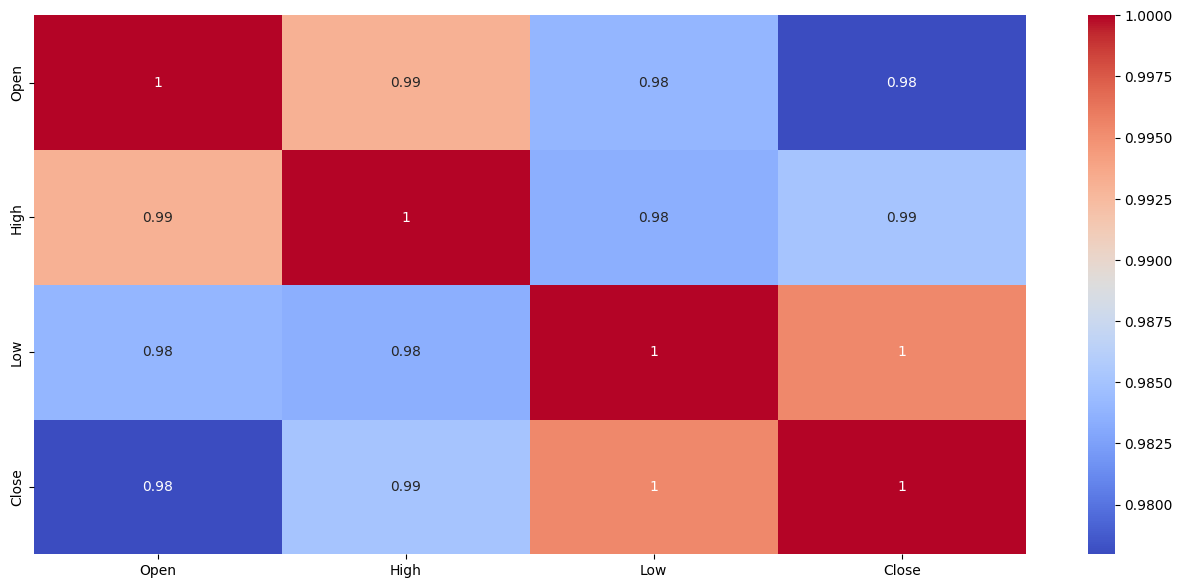

In [77]:
plt.figure(figsize=(16,7))
sns.heatmap(cor, annot=True, cmap='coolwarm')

From the heatmap above, we can clearly see that there is a very high correlation between each pair of features in our dataset. While it is desirable for the dependent variable to be highly correlated with independent variables, the independent varibles should ideally  have high correlation with one another.

***This causes a problem for us as high correlation among independent variables (multicollinearity) is a problem for our models.***

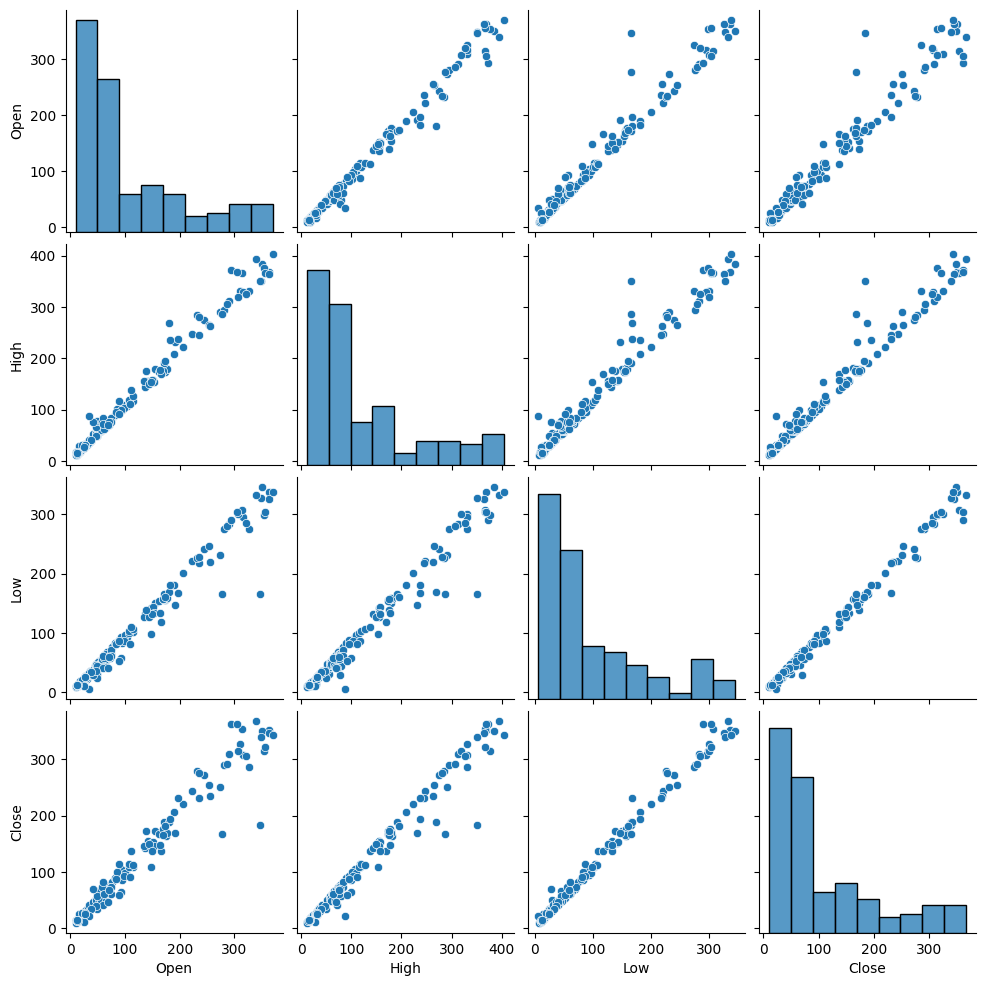

In [78]:
# Let's visualise the relationship between each pair of variables using pair plots.
sns.pairplot(df)

In [79]:
# Dealing with multicollinearity using VIF analysis.
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calc_vif(X):
   
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
X=df[['Open', 'High', 'Low']]        # here x is our independent variables.
print(calc_vif(X))

  variables         VIF
0      Open  175.185704
1      High  167.057523
2       Low   71.574137


As we can see the values of VIF factor are very high. However since the dataset is so small and has just 3 independent features, multicollinearity is unavoidable here as any feature engineering will lead to loss of information.

In [80]:
# create the data of independent varible.
x=np.log10(df[inde_var]).values            #apply log distribution on independent variable.

# create the data of dependent variable.
y=np.log10(df[depe_var]).values            # apply log distribution on dependent variable

In [81]:
# splitting the data into a train and a test set. we do this using train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[2.54157924 2.54419211 2.51501235]
 [1.86332286 1.87378546 1.81471361]
 [2.49692965 2.56348109 2.48763322]
 [1.5728716  1.62065648 1.54777471]
 [2.54057972 2.54406804 2.22050035]
 [1.34830486 1.4835873  1.30749604]
 [2.2367891  2.24024963 2.1934029 ]
 [1.68051681 1.82282165 1.66379512]
 [1.3588862  1.48429984 1.30963017]
 [2.14238947 2.24333575 2.14097916]
 [1.48657215 1.55798815 1.46404221]
 [2.03514946 2.05865374 2.0019067 ]
 [2.13229172 2.19173039 2.10380372]
 [2.1886473  2.25285303 2.17744992]
 [1.26007139 1.26481782 1.1271048 ]
 [1.40823997 1.45178644 1.04532298]
 [2.55990663 2.56646106 2.52810646]
 [1.1360861  1.23451728 1.13289977]
 [1.62117628 1.67486114 1.52633928]
 [1.93298082 2.00774778 1.92132224]
 [1.12548127 1.14238947 1.10991586]
 [1.68930886 1.68930886 1.38219721]
 [1.86923172 1.88801091 1.81056853]
 [2.4573671  2.48620371 2.44748363]
 [1.87157294 1.91907809 1.85509495]
 [2.03981055 2.04375513 1.91248776]
 [1.29666519 1.33845649 1.19865709]
 [2.23044892 2.24787511 2.19

***Scaling the data is very important for us so as to avoid giving more importance to features with large values. This is achieved by normalization or standardization of the data.***

In [82]:
from sklearn.preprocessing import StandardScaler          # scaling the data 
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [83]:
# checking the values.
x_train[0:10]

array([[ 1.63087688,  1.56185994,  1.65119202],
       [ 0.06157823, -0.01756624,  0.06602955],
       [ 1.52757   ,  1.60730327,  1.58921795],
       [-0.61044606, -0.61391853, -0.53820051],
       [ 1.62856425,  1.56156765,  0.98454885],
       [-1.13003171, -0.93684292, -1.08208372],
       [ 0.92567635,  0.84579498,  0.92321238],
       [-0.36138467, -0.13763305, -0.27558228],
       [-1.1055494 , -0.93516422, -1.07725301],
       [ 0.70726157,  0.85306563,  0.80454853]])

## Linear Regression

In [84]:
# importing LinearRegression model and the metrics that we will use for evaluating different models performance.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [85]:
model_lr=LinearRegression()           # initialize the model
model_lr.fit(x_train, y_train)     # here we fiiting the model on our training dataset.

LinearRegression()

In [86]:
y_pred_linear=model_lr.predict(x_test)      # predict on our test data.


In [87]:
# check the model parameters.
model_lr.intercept_        # model intercept.


array([1.83574842])

In [88]:
model_lr.coef_             # model coefficient.

array([[-0.28714003,  0.39267055,  0.32904134]])

In [89]:
MAE_linear = round(mean_absolute_error(10**(y_test),(10**y_pred_linear)),4)           # here we find the mean absolute error.
print(f"Mean Absolute Error : {MAE_linear}")

Mean Absolute Error : 5.449


In [90]:
mse_linear=round(mean_squared_error((10**y_test),(10**y_pred_linear)),4)             # here we find the mean squared error.
print(f'Mean squared error :{mse_linear}')

Mean squared error :123.7742


In [91]:
rmse_linear=round(np.sqrt(mse_linear),4)                       # here we find the root mean squared error.
print(f'root mean squared error :{rmse_linear}')

root mean squared error :11.1254


In [92]:
R2_linear=round(r2_score((10**y_test),(10**y_pred_linear)),4)       # here we find the r2 score.
print(f'R2 score,{R2_linear}')

R2 score,0.9858


In [93]:
adjusted_r2_linear=round(1-(1-r2_score(10**y_test,10**y_pred_linear))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),3)
print(f'adjusted_r2 : {adjusted_r2_linear}')

adjusted_r2 : 0.985


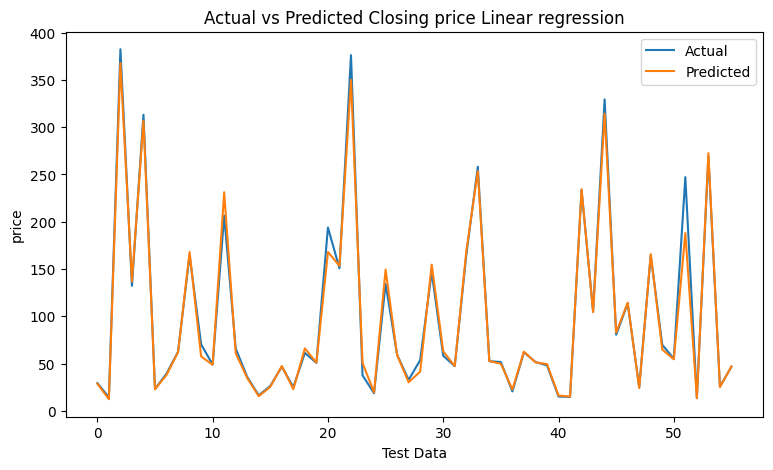

In [94]:
# here we plotting the actual vs predicted clossing price linear regression.

plt.figure(figsize=(9,5))
plt.plot(10**y_pred_linear)
plt.plot(np.array(10**y_test))
plt.legend(['Actual','Predicted'])
plt.xlabel('Test Data')
plt.ylabel('price')
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

Now we need to store our performance data for this model so that we can compare them with other models. Let's store them in a dict for now.

In [95]:
linear_regression_list={'Mean Absolute Error' : MAE_linear,'Mean squared Error' : mse_linear,
                   'Root Mean squared Error' : rmse_linear,'R2 score' : R2_linear,'Adjusted R2 score' : adjusted_r2_linear}

In [96]:
# converting above dict into dataframe.    
import pandas as pd

df=pd.DataFrame.from_dict(linear_regression_list,orient='index').reset_index()          
df

,index,0
0,Mean Absolute Error,5.4490
1,Mean squared Error,123.7742
2,Root Mean squared Error,11.1254
3,R2 score,0.9858
4,Adjusted R2 score,0.9850


In [97]:
df =df.rename(columns={'index':'Metric',0:'Linear Regression'})      # renamming the coloumns.
df

,Metric,Linear Regression
0,Mean Absolute Error,5.4490
1,Mean squared Error,123.7742
2,Root Mean squared Error,11.1254
3,R2 score,0.9858
4,Adjusted R2 score,0.9850


Here we see we can used this dataframe for eaisy to compaire them.

# Lasso regression with cross validated regularization.

In [98]:
# installed the lasso regresion.
from sklearn.linear_model import Lasso

In [99]:
# Initializing the model with some base values.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fitting the model on our training data.
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [100]:
lasso.intercept_   # print the intercept.

array([1.83574842])

In [101]:
lasso.coef_    # print the coef.

array([-0.25566873,  0.36761577,  0.32257746])

In [102]:
# Cross validation. optimizing our model by finding the best value of our hyperparameter.
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters. 
                                                                                  
lasso_regressor = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [103]:
lasso_regressor.best_params_      # getting the best parameter
# after several iterations and trials, we get this value as best parameter value.

{'alpha': 1e-15}

In [104]:
# getting the best score
lasso_regressor.best_score_

-0.0008864089953501649

In [105]:
# Predicting on the test dataset.
y_pred_lasso = lasso_regressor.predict(x_test)
print(y_pred_lasso)

[1.4660699  1.15730592 2.58257424 2.12118707 2.49579201 1.36353971
 1.59457507 1.79550814 2.21676909 1.84676279 1.68933043 2.3148697
 1.81882047 1.55384966 1.21328065 1.41996342 1.66923851 1.39692629
 1.78670112 1.70540499 2.28750251 2.1782504  2.5753908  1.57392156
 1.2680813  2.12819203 1.7728325  1.51532822 1.72893921 2.16626205
 1.7646623  1.67473778 2.21671999 2.4117786  1.71987797 1.71255741
 1.31127479 1.79208892 1.71280571 1.68139842 1.17824335 1.16653154
 2.36854985 2.02157807 2.51774995 1.90522577 2.05563103 1.39746669
 2.2163913  1.84344468 1.74138982 2.39296779 1.1307303  2.4300124
 1.40826712 1.66855101]


In [106]:
# checking the performance using evaluation metrics.
MAE_lasso = round(mean_absolute_error(10**(y_test),10**(y_pred_lasso)),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso  = round(mean_squared_error(10**(y_test),10**(y_pred_lasso)),4)
print("Mean squared Error :" , MSE_lasso)

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print("Root Mean squared Error :" ,RMSE_lasso)

R2_lasso = round(r2_score(10**(y_test), 10**(y_pred_lasso)),4)
print("R2 score :" ,R2_lasso)

Adjusted_R2_lasso = round(1-(1-r2_score(10**y_test, 10**y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_lasso)

Mean Absolute Error : 5.449
Mean squared Error : 123.7742
Root Mean squared Error : 11.1254
R2 score : 0.9858
Adjusted R2 score:  0.9849


In [107]:
# Now saving these metrics to our metrics dataframe. First we save them in a list and then we pass them to the df.
df['Lasso'] = [MAE_lasso, MSE_lasso, RMSE_lasso, R2_lasso, Adjusted_R2_lasso]

Text(0.5, 1.0, 'Actual vs Predicted Closing price Lasso regression')

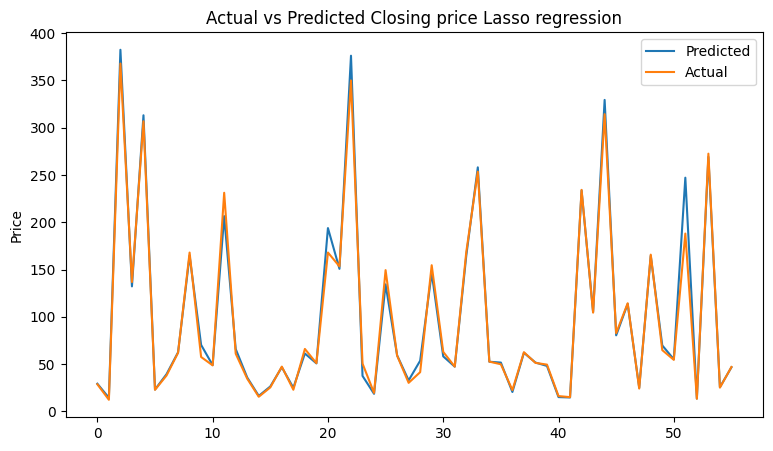

In [108]:
# plotting the predicted values vs actual.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Lasso regression")

 **Ridge Regression** with cross validated regularization.

In [109]:
# importing ridge regressor model.
from sklearn.linear_model import Ridge    
ridge = Ridge()         # iitializing the model

# initiating the parameter grid for alpha (regularization strength).
ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

# cross validation. 
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [110]:
# finding the best parameter value (for alpha)
ridge_regressor.best_params_

{'alpha': 1e-15}

In [111]:
# getting the best score for optimal value of alpha.
ridge_regressor.best_score_

-0.0009267107649332244

In [112]:
# predicting on the test dataset now.
y_pred_ridge = ridge_regressor.predict(x_test)

In [113]:
mae_ridge=round(mean_absolute_error(10**(y_test),10**(y_pred_lasso)),4)            # evaluating performance.
print(f'mean_absolute_error : {mae_ridge}')                                    

mean_absolute_error : 5.449


In [114]:
msc_ridge=round(mean_squared_error(10**(y_test),10**(y_pred_ridge)),4)
print(f'mean squared root : {msc_ridge}')                                     # here we find the mean squared error.

mean squared root : 123.7742


In [115]:
rmsc_ridge=round(np.sqrt(msc_ridge),4)                                   # here we find the root mean squared error.
print(f'root mean square root :{rmsc_ridge}')

root mean square root :11.1254


In [116]:
R2_ridge=round(r2_score(10**(y_test), 10**(y_pred_ridge)),4)                    # here we find r2 score.
print(f'R2 ridge: {R2_ridge}')

R2 ridge: 0.9858


In [117]:
Adjusted_R2_ridge=round(1-(1-r2_score(10**y_test, 10**y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)   # here we fid adjusted r2 ridge 
print(f'adjusted R2 ridge : {Adjusted_R2_ridge}')

adjusted R2 ridge : 0.9849


In [118]:
ridge_regression_list=[mae_ridge,msc_ridge,rmsc_ridge,R2_ridge,Adjusted_R2_ridge]          # create the all matrix list.
df['ridge']=ridge_regression_list                                                        # this all matri add in dataframe.

Text(0.5, 1.0, 'Actual vs Predicted Closing price Ridge regression')

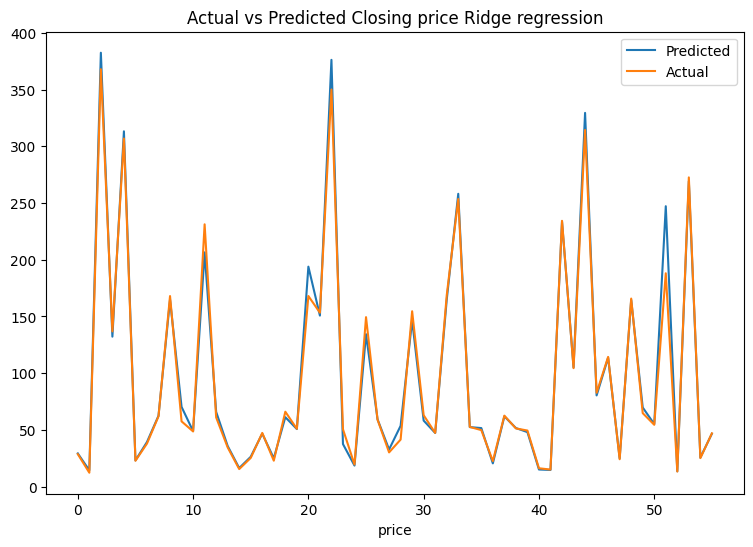

In [119]:
# Plotting predicted and actual target variable values.
plt.figure(figsize=(9,6))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('price')
plt.title('Actual vs Predicted Closing price Ridge regression')

## 4.Elastic net regression with cross validation

In [120]:
# importing and initializing Elastic-Net Regression.
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# initializing the parameters.
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

# cross-validation
elasticnet_regression=GridSearchCV(elasticnet_model,elastic_net_param_grid,scoring='neg_mean_squared_error',cv=5)
elasticnet_regression.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [121]:
# here we find the best parameter.
elasticnet_regression.best_params_

{'alpha': 1e-15, 'l1_ratio': 0.1}

In [122]:
elasticnet_regression.best_score_       # here we find the best score.

-0.0008867264658516992

In [123]:
y_pred_elastic_net=elasticnet_regression.predict(x_test)       # making the prediction

In [124]:
MAE_elastic_net = round(mean_absolute_error(10**(y_test),10**(y_pred_elastic_net)),4)
print(f"Mean Absolute Error : {MAE_elastic_net}")

MSE_elastic_net  = round(mean_squared_error(10**(y_test),10**(y_pred_elastic_net)),4)
print("Mean squared Error :" , MSE_elastic_net)

RMSE_elastic_net = round(np.sqrt(MSE_elastic_net),4)
print("Root Mean squared Error :" ,RMSE_elastic_net)

R2_elastic_net = round(r2_score(10**(y_test), (10**y_pred_elastic_net)),4)
print("R2 score :" ,R2_elastic_net)

Adjusted_R2_elastic_net = round(1-(1-r2_score(10**y_test, 10**y_pred_elastic_net))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_elastic_net)

Mean Absolute Error : 5.4488
Mean squared Error : 123.7624
Root Mean squared Error : 11.1249
R2 score : 0.9858
Adjusted R2 score:  0.9849


In [125]:
# storing these metrics in our dataframe.
elastic_net_metric_list = [MAE_elastic_net,MSE_elastic_net,RMSE_elastic_net,R2_elastic_net,Adjusted_R2_elastic_net]
df['Elastic Net'] = elastic_net_metric_list

Text(0.5, 1.0, 'Actual vs Predicted Closing price Elastic Net regression')

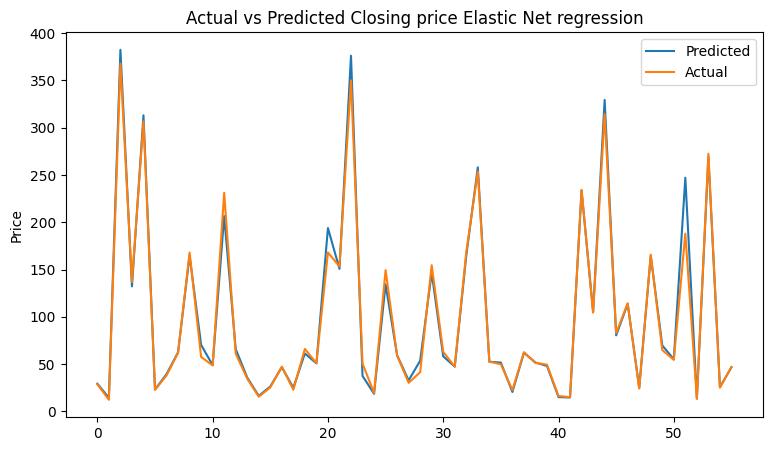

In [126]:
# Now let us plot the actual and predicted target variables values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_elastic_net)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Elastic Net regression")

In [127]:
# comparing the performance of all models that we have implemented.
df

,Metric,Linear Regression,Lasso,ridge,Elastic Net
0,Mean Absolute Error,5.4490,5.4490,5.4490,5.4488
1,Mean squared Error,123.7742,123.7742,123.7742,123.7624
2,Root Mean squared Error,11.1254,11.1254,11.1254,11.1249
3,R2 score,0.9858,0.9858,0.9858,0.9858
4,Adjusted R2 score,0.9850,0.9849,0.9849,0.9849


From above data, we can clearly see that the best performing model is Linear Regression as it scores the best in every single metric.

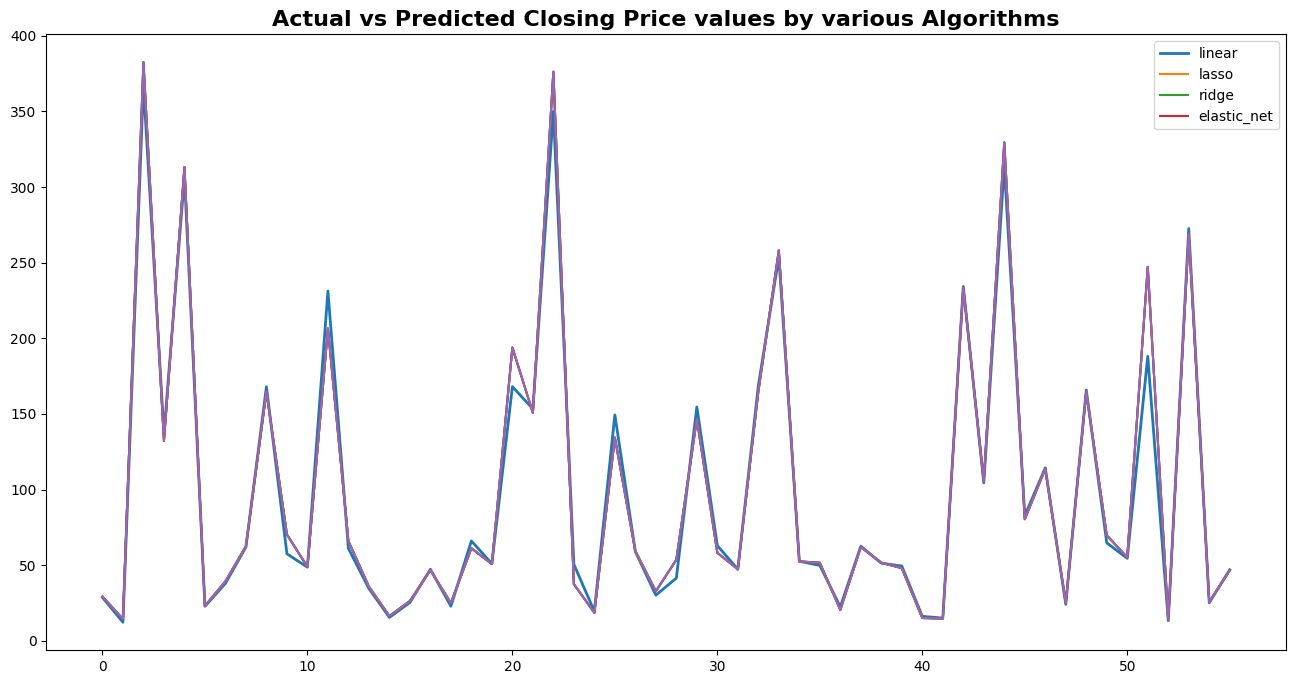

In [128]:
# Plotting the predicted values of all the models against the true values.
plt.figure(figsize=(16,8))
plt.plot(10**y_test, linewidth=2)
plt.plot(10**y_pred_linear)
plt.plot(10**y_pred_lasso)
plt.plot(10**y_pred_ridge)
plt.plot(10**y_pred_elastic_net)
plt.legend(['linear','lasso','ridge','elastic_net'])
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=16)
plt.show()

As we can see from above graph, all of our models are performing really well and are able to closely approximate the actual values.

# Conclusion:

*   **Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.**

*   **After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.**

*   **There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.**

*   **We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.**

*   **There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.**

*   **We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.**

*   **We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and Linear regressor is the best performing model with Adjusted R2 score value of 0.9850* and scores well on all evaluation metrics.** 

*   **All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 98%.**

*   **With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.** 
